In [1]:
import pandas as pd
import numpy as np

from datetime import datetime




%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go


import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [2]:
df_plot=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.sort_values('date',ascending=False).head()

,date,India,US,Spain,Germany,United Kingdom,"Korea, South",Japan
232,2020-09-10,4562414,6396100,554143,258149,360544,21919,73916
231,2020-09-09,4465863,6360212,543379,256433,357613,21743,73264
230,2020-09-08,4370128,6327009,534513,254957,354932,21588,72724
229,2020-09-07,4280422,6300622,525549,253626,352451,21432,72213
228,2020-09-06,4204613,6276365,498989,251728,349500,21296,71918


In [3]:
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style(style="darkgrid")


<Figure size 1152x648 with 0 Axes>

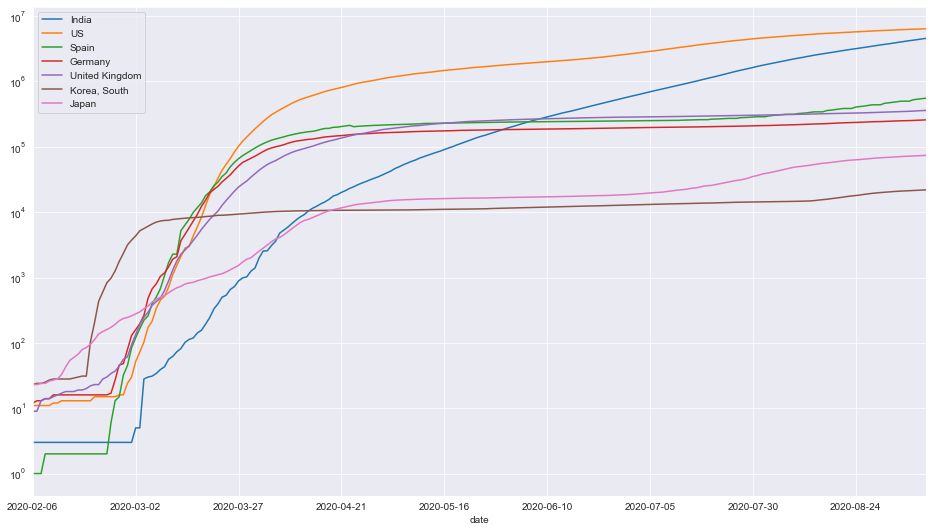

In [4]:
plt.figure()
ax=df_plot.iloc[15:,:].set_index('date').plot()
ax.set_yscale('log')



## PLOTLY

In [5]:
country_list=['India',
              'US',
              'Spain',
              'Germany',
              'United Kingdom',
              'Korea, South',
              'Japan'
             ] 

In [6]:
fig =go.Figure()

for each in country_list:
    fig.add_trace(go.Scatter(
        x=df_plot.date, 
        y=df_plot[each],
        name=each,
        mode="markers+lines",
        opacity=0.9,
        line_width=2,
        marker_size=3,))

fig.update_layout(
    width = 1080,
    height=720,
    yaxis_type="log",
    yaxis_title="Confirmed Infected People",
    xaxis_title = "Date",
    xaxis_rangeslider_visible=True,
    
)


In [7]:
layout = dict(
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
    )

In [8]:
app = dash.Dash()

options=[]
for each in country_list:
    option_dict = {}
    option_dict['label']=each
    option_dict['value']=each
    
    options.append(option_dict)

app.layout = html.Div([
    
    html.Label('Multi Country Select'),
    dcc.Dropdown(
        id='country_drop_down',
        options=options,
        value=["US", "India"],
        multi=True
    ),



    dcc.Graph(figure=fig, id='main_window_slope')
])



In [9]:
@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')]

)


def update_figure(country_list):

    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )

    return {
        'data' : traces,
        'layout' : layout
    }

In [10]:
app.run_server(host = '127.0.0.1', debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
